In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import clear_output
import time
from sklearn.preprocessing import StandardScaler


In [2]:
# =========================================
# STEP 1: Load your dataset
# =========================================
data = pd.read_csv(r"D:\project\Student_Performance.csv", encoding="unicode escape")
data



,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
X = data[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced']]
y = data['Performance Index']


scaler = StandardScaler()
X = scaler.fit_transform(X)

X



array([[ 0.77518771,  1.70417565,  1.45620461, -1.24975394],
       [-0.38348058,  0.72391268, -1.49229423, -0.90098215],
       [ 1.16141048, -1.06362569,  0.27680507, -0.90098215],
       ...,
       [ 0.38896495,  0.7815752 ,  0.86650484,  0.1453332 ],
       [ 1.54763324,  1.5888506 ,  0.27680507, -1.59852572],
       [ 0.77518771,  0.26261245,  0.86650484, -1.24975394]],
      shape=(10000, 4))

In [4]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [5]:
def compute_loss(X, y, w, b):
    """Compute Mean Squared Error loss"""
    m = len(y)
    y_pred = np.dot(X, w) + b
    loss = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    return loss

def gradient_descent(X, y, w_init, b_init, alpha, num_iters):
    """Perform gradient descent for n features"""
    m, n = X.shape
    w = w_init
    b = b_init

    w_history = []
    b_history = []
    loss_history = []

    print(f"\nStarting Gradient Descent:")
    print(f"Initial parameters: w = {w}, b = {b:.4f}")
    print(f"Learning rate: {alpha}, Iterations: {num_iters}")
    print("-" * 60)

    for i in range(num_iters):
        # Predictions
        y_pred = np.dot(X, w) + b

        # Gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        # Parameter update
        w = w - alpha * dw
        b = b - alpha * db

        # Compute loss
        loss = compute_loss(X, y, w, b)

        # Save history
        w_history.append(w.copy())
        b_history.append(b)
        loss_history.append(loss)

        # Print formatted progress
        if i % 50 == 0 or i == num_iters - 1:
            print(f"Iteration {i:4d}: w[:] = {w}, b = {b:.4f}, Cost = {loss:.4f}")

    print("-" * 60)
    print(f"Final parameters:\nw = {w}\nb = {b:.4f}")

    return np.array(w_history), np.array(b_history), np.array(loss_history), w, b

In [6]:
# =========================================
# STEP 3: Initialize and Run Gradient Descent
# =========================================
alpha = 0.01
iterations = 250

w_init = np.zeros(X.shape[1])
b_init = 0

w_history, b_history, loss_history, w, b = gradient_descent(
    X, y, w_init, b_init, alpha, iterations
)


Starting Gradient Descent:
Initial parameters: w = [0. 0. 0. 0.], b = 0.0000
Learning rate: 0.01, Iterations: 250
------------------------------------------------------------
Iteration    0: w[:] = [0.07179957 0.17582245 0.0092419  0.00831254], b = 0.5522, Cost = 1675.4824
Iteration   50: w[:] = [2.89826236 7.0584447  0.35984585 0.30855001], b = 22.1476, Cost = 615.1117
Iteration  100: w[:] = [ 4.63278286 11.23197123  0.55803127  0.45798684], b = 35.2129, Cost = 226.6833
Iteration  150: w[:] = [ 5.69721122 13.76292321  0.66951814  0.52877265], b = 43.1175, Cost = 84.3909
Iteration  200: w[:] = [ 6.35042301 15.29788019  0.73188361  0.55964055], b = 47.8998, Cost = 32.2630
Iteration  249: w[:] = [ 6.74503331 16.21443658  0.76603203  0.57091276], b = 50.7484, Cost = 13.3895
------------------------------------------------------------
Final parameters:
w = [ 6.74503331 16.21443658  0.76603203  0.57091276]
b = 50.7484


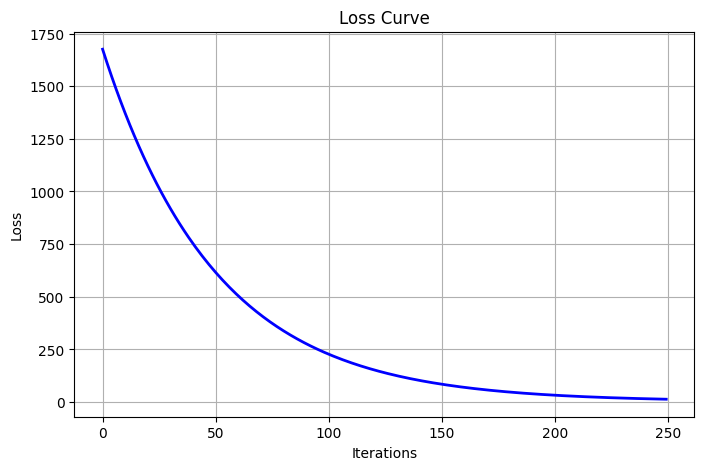

In [7]:
# =========================================
# STEP 4: Plot loss curve
# =========================================
plt.figure(figsize=(8,5))
plt.plot(range(iterations), loss_history, 'b-', linewidth=2)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()



Z min: 12.244153205358138 Z max: 16.44435826458941
Any NaNs in Z? False


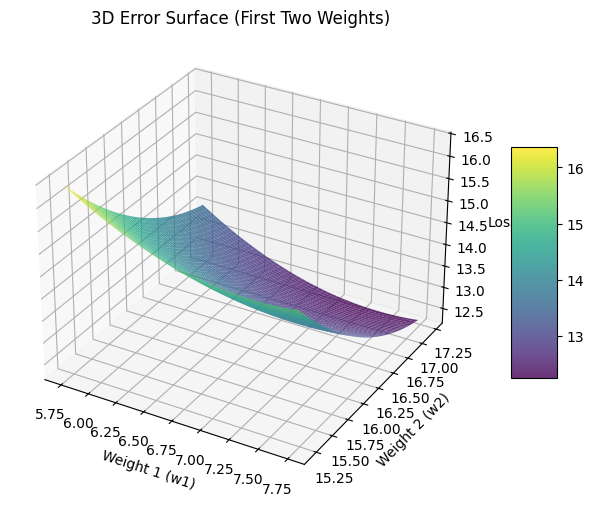

In [8]:
# =========================================
# STEP 5: 3D Error Surface (for first 2 features)
# =========================================
if X.shape[1] >= 2:
    # pick first two weights for visualization
    w1_vals = np.linspace(w[0] - 1, w[0] + 1, 50)
    w2_vals = np.linspace(w[1] - 1, w[1] + 1, 50)
    W1, W2 = np.meshgrid(w1_vals, w2_vals)

    # Fix other weights at final learned values
    Z = np.zeros_like(W1)
    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            w_temp = w.copy()
            w_temp[0] = W1[i, j]
            w_temp[1] = W2[i, j]
            Z[i, j] = compute_loss(X, y, w_temp, b)

    # Debugging output to understand surface values
    print("Z min:", np.nanmin(Z), "Z max:", np.nanmax(Z))
    print("Any NaNs in Z?", np.isnan(Z).any())

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(W1, W2, Z, cmap=cm.viridis, alpha=0.8)

    ax.set_xlabel('Weight 1 (w1)')
    ax.set_ylabel('Weight 2 (w2)')
    ax.set_zlabel('Loss')
    ax.set_title('3D Error Surface (First Two Weights)')
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
else:
    print("3D surface requires at least 2 features.")


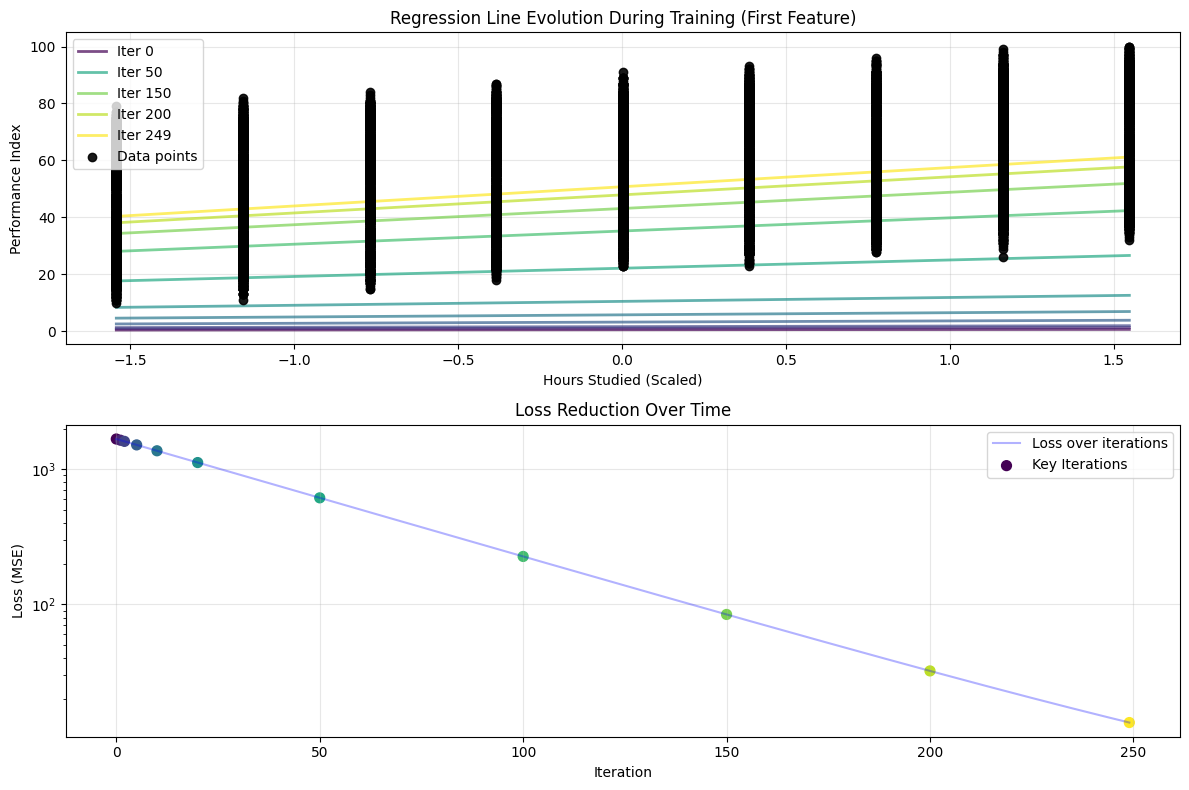

In [9]:
# Use first feature for visualization
x = X[:, 0]  # first column after scaling

# Sort x for smooth lines
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]

# Key iterations to visualize
key_iterations = [0, 1, 2, 5, 10, 20, 50, 100, 150, 200, 249]
colors = plt.cm.viridis(np.linspace(0, 1, len(key_iterations)))

plt.figure(figsize=(12, 8))

# ---- Regression Line Evolution ----
plt.subplot(2, 1, 1)

for i, idx in enumerate(key_iterations):
    if idx < len(w_history):
        w_current = w_history[idx]
        b_current = b_history[idx]

        # Predictions for sorted x
        y_pred_current = w_current[0] * x_sorted + b_current
        plt.plot(x_sorted, y_pred_current, color=colors[i], alpha=0.7, linewidth=2,
                 label=f'Iter {idx}' if idx in [0, 50, 150, 200, 249] else None)  # only label first, mid, last

# Plot original data points on top
plt.scatter(x, y, alpha=0.9, color='black', label='Data points', zorder=5)

plt.xlabel('Hours Studied (Scaled)')
plt.ylabel('Performance Index')
plt.title('Regression Line Evolution During Training (First Feature)')
plt.legend()
plt.grid(True, alpha=0.3)

# ---- Loss Reduction ----
plt.subplot(2, 1, 2)
plt.plot(range(iterations), loss_history, 'b-', alpha=0.3, label='Loss over iterations')
plt.scatter(key_iterations, loss_history[key_iterations], color=colors, s=50, label='Key Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.title('Loss Reduction Over Time')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()
